In [1]:
import nltk
import numpy as np
import string
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')
from nltk.corpus import gutenberg
austen = gutenberg.sents('austen-sense.txt')+gutenberg.sents('austen-emma.txt')+gutenberg.sents('austen-persuasion.txt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print(len(austen))

16498


In [3]:
austen[:3]

[['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'],
 ['CHAPTER', '1'],
 ['The',
  'family',
  'of',
  'Dashwood',
  'had',
  'long',
  'been',
  'settled',
  'in',
  'Sussex',
  '.']]

In [4]:
from tensorflow.keras import preprocessing 
from nltk.corpus import stopwords 
import re
stop_words = set(stopwords.words('english')) 
nltk.download('stopwords')
normalized_corpus_temp = []
text = [token for alist in austen for token in alist ]
for tokenList in austen:
    normalisedTokenList = preprocessing.text.text_to_word_sequence(' '.join(tokenList), filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
    normalisedTokenList = [w for w in normalisedTokenList if not w in stop_words]
    normalisedTokenList = [w for w in normalisedTokenList if not w in string.punctuation]
    normalisedTokenList = [w for w in normalisedTokenList if not re.search(r'\d',w) ]
    
    normalized_corpus_temp.append(normalisedTokenList)
normalized_corpus = [' '.join(w) for w in normalized_corpus_temp if w and len(w) > 3]
normalized_corpus_tokens = [w for w in normalized_corpus_temp if w and len(w) > 3]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
len(normalized_corpus)

12498

In [6]:
normalized_corpus[10]

'therefore succession norland estate really important sisters fortune independent might arise father inheriting property could small'

In [7]:
normalized_corpus_tokens[:3]

[['sense', 'sensibility', 'jane', 'austen'],
 ['family', 'dashwood', 'long', 'settled', 'sussex'],
 ['estate',
  'large',
  'residence',
  'norland',
  'park',
  'centre',
  'property',
  'many',
  'generations',
  'lived',
  'respectable',
  'manner',
  'engage',
  'general',
  'good',
  'opinion',
  'surrounding',
  'acquaintance']]

In [0]:
import collections, itertools
word_counter = collections.Counter(list(itertools.chain.from_iterable(normalized_corpus_tokens)))

In [9]:
len(set(list(itertools.chain.from_iterable(normalized_corpus_tokens))))

10038

In [0]:
word_ids = list(set(list(itertools.chain.from_iterable(normalized_corpus_tokens))))

In [0]:
word2idx = {}
word2idx = {token:id+1 for id,token in enumerate(word_ids)}
# word2idx['<PAD>'] = 0
# word2idx['<UNK>'] = 1

In [0]:
idx2word = {v: k for k,v in word2idx.items()}

In [0]:
# sents_as_ids = []
    
# for sent_token in normalized_corpus_tokens:
#     temp=[]
#     for token in sent_token:
#         if token in word_ids:
#             temp.append(word2idx[token])
#         else:
#             temp.append(word2idx['<UNK>']) 
#     sents_as_ids.append(temp)

sents_as_ids = []
for i in range(len(normalized_corpus_tokens)):
    sents_as_ids.append([word2idx[j] for j in normalized_corpus_tokens[i]])


In [0]:
vocab_size = len(word_ids) + 1  # 1 was added for zero padding
embed_size = 100   # We are creating 100D embeddings.

In [15]:
print('Number of unique words:', len(word_ids))
word_ids[0:10]

Number of unique words: 10038


['playing',
 'robbing',
 'unattended',
 'hill',
 'opinion',
 'lists',
 'retarding',
 'villages',
 'drift',
 'employed']

In [16]:
print('\nSample word2idx: ', list(word2idx.items())[:10])


Sample word2idx:  [('playing', 1), ('robbing', 2), ('unattended', 3), ('hill', 4), ('opinion', 5), ('lists', 6), ('retarding', 7), ('villages', 8), ('drift', 9), ('employed', 10)]


In [17]:
print('\nSample idx2word:', list(idx2word.items())[:10])


Sample idx2word: [(1, 'playing'), (2, 'robbing'), (3, 'unattended'), (4, 'hill'), (5, 'opinion'), (6, 'lists'), (7, 'retarding'), (8, 'villages'), (9, 'drift'), (10, 'employed')]


In [18]:
print('\nSample normalized corpus:', normalized_corpus[:3])


Sample normalized corpus: ['sense sensibility jane austen', 'family dashwood long settled sussex', 'estate large residence norland park centre property many generations lived respectable manner engage general good opinion surrounding acquaintance']


In [19]:
print('\nAbove sentence as a list of ids:' , sents_as_ids[:30])


Above sentence as a list of ids: [[4866, 8100, 3422, 1322], [4805, 8599, 2756, 7884, 1330], [8903, 3590, 1172, 348, 4891, 91, 9134, 9131, 9113, 578, 2141, 2204, 9128, 8210, 3299, 5, 4549, 1657], [751, 4999, 8903, 1152, 5691, 578, 2716, 8895, 9131, 2076, 1932, 4599, 1697, 7194, 7108], [2682, 1253, 8552, 2076, 93, 4433, 8587, 8007, 6117, 8904, 8298, 8198, 3040, 4805, 944, 2621, 7303, 8599, 8091, 5806, 348, 8903, 8991, 2060, 4946], [4900, 944, 8374, 4576, 2663, 5351, 6664, 4775, 9813], [4599, 6716, 2621, 418, 7303, 8599, 7806, 3409, 3832, 8217, 9228, 4860, 4072, 3903, 8420, 7928, 1102, 8895, 3603, 5889, 3438, 4576, 9723, 1873, 2979], [9006, 4276, 2621, 7303, 8599, 4605, 1495, 7018, 4338, 5311, 3879], [1495, 2808, 2141, 5819, 5691, 9260, 9245, 9119, 5090, 3590, 3035, 5207, 8566, 8895], [4276, 6646, 1253, 9862, 3082, 9723, 3650], [677, 1029, 348, 8903, 9401, 9368, 6819, 9119, 6460, 6666, 321, 6096, 9903, 9134, 3603, 222], [5090, 8429, 6096, 8926, 1325, 4067, 8631, 6514, 546, 4687, 6834, 91

In [20]:
from keras.preprocessing.sequence import skipgrams
skip_grams=[skipgrams(sent, vocabulary_size=vocab_size, window_size=5, negative_samples=1.0) for sent in sents_as_ids]

Using TensorFlow backend.


In [21]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(len(pairs)):
    print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        # the first word and its index
        idx2word[pairs[i][0]], pairs[i][0],
        # the second word and its index
        idx2word[pairs[i][1]], pairs[i][1],
        # the label
        labels[i]))

(sensibility (8100), repentance (3004)) -> 0
(sensibility (8100), assisted (3743)) -> 0
(sense (4866), farther (7701)) -> 0
(sense (4866), jane (3422)) -> 1
(sense (4866), stormy (7479)) -> 0
(jane (3422), vile (7914)) -> 0
(sensibility (8100), jane (3422)) -> 1
(sense (4866), partly (4384)) -> 0
(sense (4866), sensibility (8100)) -> 1
(austen (1322), eccentric (7897)) -> 0
(austen (1322), sensibility (8100)) -> 1
(sensibility (8100), sense (4866)) -> 1
(jane (3422), came (3233)) -> 0
(austen (1322), hurting (4962)) -> 0
(austen (1322), sense (4866)) -> 1
(jane (3422), sense (4866)) -> 1
(sensibility (8100), austen (1322)) -> 1
(austen (1322), jane (3422)) -> 1
(sense (4866), austen (1322)) -> 1
(jane (3422), shoes (8079)) -> 0
(jane (3422), sensibility (8100)) -> 1
(austen (1322), sold (9557)) -> 0
(sensibility (8100), refer (3803)) -> 0
(jane (3422), austen (1322)) -> 1


In [0]:
from keras.layers import Dot, Input
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import plot_model
# from tensorflow.keras import optimizers

In [23]:
target_word = Input((1,), dtype='int32')
target_embedding = Embedding(vocab_size,
                             embed_size,
                             name='target_embed_layer',
                             embeddings_initializer='glorot_uniform',
                             input_length=1)(target_word)
target_input = Reshape((embed_size,))(target_embedding)

In [0]:
context_word = Input((1,), dtype='int32')
context_embedding = Embedding(vocab_size,
                              embed_size,
                              name='context_embed_layer',
                              embeddings_initializer='glorot_uniform',
                              input_length=1)(context_word)
context_input = Reshape((embed_size,))(context_embedding)

In [0]:
merged_inputs = Dot(axes=-1, normalize=False)([target_input, context_input])

In [0]:
label = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(merged_inputs)

In [0]:
model=Model(inputs=[target_word,context_word],outputs=[label])

In [28]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'rmsprop')

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
target_embed_layer (Embedding)  (None, 1, 100)       1003900     input_1[0][0]                    
__________________________________________________________________________________________________
context_embed_layer (Embedding) (None, 1, 100)       1003900     input_2[0][0]                    
____________________________________________________________________________________________

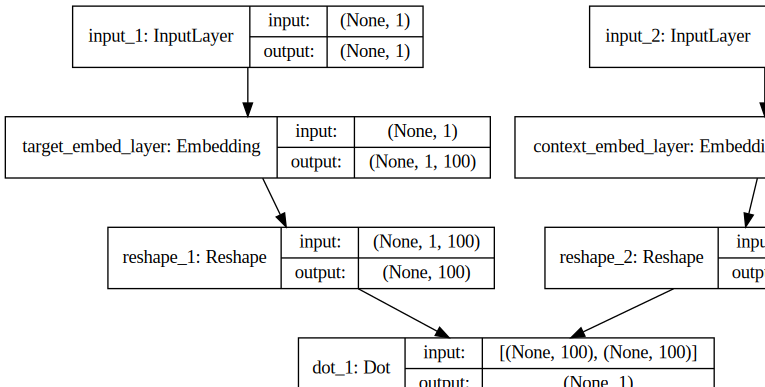

In [30]:
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

In [32]:
for epoch in range(1,25):
    epoch_loss = 0
    for i,sent_examples in enumerate(skip_grams):
        target_wds = np.array([pair[0] for pair in sent_examples[0]],dtype='int32')
        context_wds = np.array([pair[1] for pair in sent_examples[0]],dtype='int32')
        labels = np.array(sent_examples[1],dtype='int32')
        X = [target_wds,context_wds]
        Y = labels
        if i%5000 == 0:
            print('processed %d sentences' %i)
        epoch_loss += model.train_on_batch(X,Y)
    print('Processec all %d sentences' %i)
    print('Epoch:',epoch,'Loss:',epoch_loss,'\n')

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 12497 sentences
Epoch: 1 Loss: 0.22258619964122772 

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 12497 sentences
Epoch: 2 Loss: 0.2058556228876114 

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 12497 sentences
Epoch: 3 Loss: 0.19753141701221466 

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 12497 sentences
Epoch: 4 Loss: 0.19213007390499115 

Processed 0 sentences
Processed 5000 sentences
Processed 10000 sentences
Processed all 12497 sentences
Epoch: 5 Loss: 0.18818321824073792 



In [0]:
word_embeddings = model.get_layer('target_embed_layer').get_weights()[0][1:] # Recall that 0was left for padding

In [0]:
import pandas as pd
pd.DataFrame(word_embeddings, index=list(idx2word.values())[2:]).head(10)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(word_embeddings)

In [0]:
search_terms = ['<UNK>','man', 'love', 'hatred', 'woman', 'wisdom',  'kindness', 'god', 'man', 'folly', 'fool']

In [0]:
similar_words = {term: [idx2word[idx]
                        for idx in (-1 * similarity_matrix[word2idx[term]-1]).argsort()[1:6] + 1]
                        for term in search_terms}

In [0]:
print(similar_words)

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [0]:
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50
T = tsne.fit_transform(word_embeddings[:plot_only, :])
labels = [idx2word[i+1] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')